In [1]:
import pandas as pd
import re
import nltk
import numpy as np
import pandas as pd
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from termcolor import colored
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import log_loss, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc , precision_score , classification_report
from sklearn.linear_model import LogisticRegression
#from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.linear_model import SGDClassifier
#from imblearn.over_sampling import SMOTE
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
#from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from scipy.stats import stats

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\snake\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\snake\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [228]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
#from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
#from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

#from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

# [0: Negative, 1: Neutral, 2: Positive, 3: Can't Tell]

In [229]:
data = pd.read_csv('train.csv')

In [230]:
data['tweet'] = data['tweet'].apply(lambda row: str(row))

In [231]:
def preprocess(x):
    x = x.replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("don't", "do not")\
                           .replace("%", " percent ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will").replace(";", " ").replace("&", " ")\
                           .replace("amp"," ")
    return x

In [232]:
data['tweet'] = data['tweet'].fillna("").apply(preprocess)

In [233]:
data.tweet[5325]

"At home today. @mention at #sxsw:  quot apple comes up with cool technology no one's ever heard of because they do not go to conferences quot "

# Preprocessing data
- Remove @user mentions
- Remove non-alphabetic characters + spaces + apostrophe
- Remove links
- Remove single characters
- Remove stopwords
- Lemmatize words
- Stem words

In [234]:
# Setting stopwords
STOPWORDS = set(stopwords.words('english'))
STOPWORDS.remove("not")
STOPWORDS.remove('no')
STOPWORDS.remove('against')
STOPWORDS.remove('because')
STOPWORDS.remove('while')
STOPWORDS.remove('why')
STOPWORDS.remove('how')
STOPWORDS.remove('can')
STOPWORDS.add('quot')
STOPWORDS.add('RT')
STOPWORDS.add('sxsw')
STOPWORDS.add('SXSW')
STOPWORDS.add('link')
STOPWORDS.add('The')
STOPWORDS.add('iPad')
STOPWORDS.add('iPhone')
STOPWORDS.add('sxswnui')


# Function to expand tweet
def expand_tweet(tweet):
    expanded_tweet = []
    for word in tweet:
        if re.search("n't", word):
            expanded_tweet.append(word.split("n't")[0])
            expanded_tweet.append("not")
        else:
            expanded_tweet.append(word)
    return expanded_tweet

# Function to process tweets
def clean_tweet(data, wordNetLemmatizer, porterStemmer):
    data['Clean_tweet'] = data['tweet']
    print(colored("Removing user handles starting with @", "yellow"))
    data['Clean_tweet'] = data['Clean_tweet'].str.replace("@[\w]*","")
    print(colored("Removing numbers and special characters", "yellow"))
    data['Clean_tweet'] = data['Clean_tweet'].str.replace("[^a-zA-Z' ]","")
    print(colored("Removing urls", "yellow"))
    data['Clean_tweet'] = data['Clean_tweet'].replace(re.compile(r"((www\.[^\s]+)|(https?://[^\s]+))"), "")
    print(colored("Removing single characters", "yellow"))
    data['Clean_tweet'] = data['Clean_tweet'].replace(re.compile(r"(^| ).( |$)"), " ")
    print(colored("Tokenizing", "yellow"))
    data['Clean_tweet'] = data['Clean_tweet'].str.split()
    print(colored("Removing stopwords", "yellow"))
    data['Clean_tweet'] = data['Clean_tweet'].apply(lambda tweet: [word for word in tweet if word not in STOPWORDS])
    print(colored("Expanding not words", "yellow"))
    data['Clean_tweet'] = data['Clean_tweet'].apply(lambda tweet: expand_tweet(tweet))
    print(colored("Lemmatizing the words", "yellow"))
    #data['Clean_tweet'] = data['Clean_tweet'].apply(lambda tweet: [wordNetLemmatizer.lemmatize(word) for word in tweet])
    print(colored("Stemming the words", "yellow"))
    data['Clean_tweet'] = data['Clean_tweet'].apply(lambda tweet: [porterStemmer.stem(word) for word in tweet])
    print(colored("Combining words back to tweets", "yellow"))
    data['Clean_tweet'] = data['Clean_tweet'].apply(lambda tweet: ' '.join(tweet))
    return data

# Define processing methods
wordNetLemmatizer = WordNetLemmatizer()
porterStemmer = PorterStemmer()

# Pre-processing the tweets
print(colored("Processing train data", "green"))
data = clean_tweet(data, wordNetLemmatizer, porterStemmer)

Processing train data
Removing user handles starting with @
Removing numbers and special characters
Removing urls
Removing single characters
Tokenizing
Removing stopwords
Expanding not words
Lemmatizing the words
Stemming the words
Combining words back to tweets


In [235]:
data

,tweet_id,tweet,sentiment,Clean_tweet
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,appl defin languag touch differ dialect becom ...
1,1851,Learning ab Google doodles! All doodles should...,1,learn ab googl doodl all doodl light funni inn...
2,2689,one of the most in-your-face ex. of stealing t...,2,one inyourfac ex steal show yr At appl school ...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,thi app would pretti awesom not crash everi mi...
4,3604,Line outside the Apple store in Austin waiting...,1,line outsid appl store austin wait new
...,...,...,...,...
7269,3343,@mention Google plze Tammi. I'm in middle of ...,1,googl plze tammi i'm middl crazi everyth soooo...
7270,5334,RT @mention ÷¼ Are you all set? ÷_ {link} ÷...,1,are set edchat musedchat sxswi newtwitt
7271,5378,RT @mention Aha! Found proof of lactation room...,1,aha found proof lactat room excus mother' room...
7272,2173,We just launched our iPad app at #SXSW! Get al...,1,We launch app get detail first edit free


In [236]:
data.tweet[5325]

"At home today. @mention at #sxsw:  quot apple comes up with cool technology no one's ever heard of because they do not go to conferences quot "

In [237]:
data.Clean_tweet[5325]

"At home today appl come cool technolog no one' ever heard becaus not go confer"

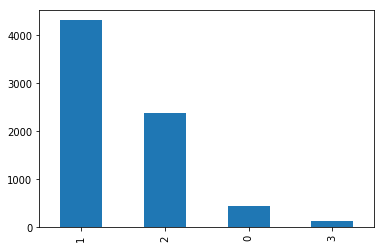

In [238]:
data.sentiment.value_counts().plot(kind='bar')

# Word Cloud for sentiment : Negative

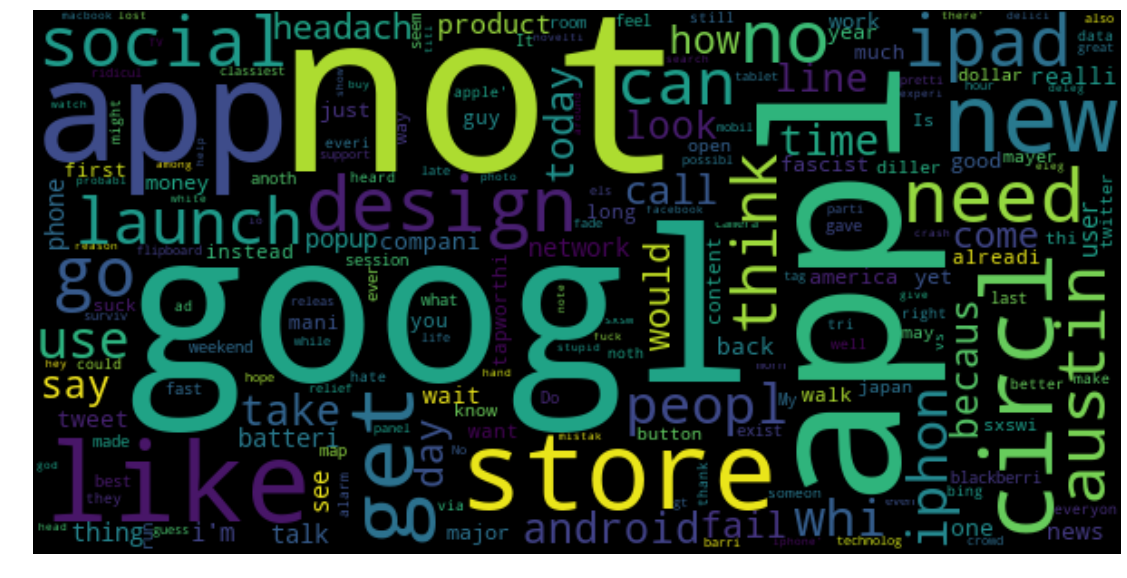

In [239]:
freq_dict = dict()
for tw in (data[data['sentiment'] == 0]['Clean_tweet']):
    for word in tw.split(" "):
        freq_dict[word] = freq_dict.get(word, 0) + 1
feat_count_sorted = dict(sorted(freq_dict.items(), key = lambda x: x[1], reverse = True))
count_data = {"Words":list(feat_count_sorted.keys()), "Count": list(feat_count_sorted.values())}
count_df = pd.DataFrame(data = count_data)
from wordcloud import WordCloud
worcloudPlot = WordCloud(background_color="black", width=600, height=300)
worcloudPlot.generate_from_frequencies(frequencies=freq_dict)
plt.figure(figsize=(20,10))
plt.imshow(worcloudPlot, interpolation="bilinear")
plt.axis("off")
plt.show()

# Word Cloud for sentiment : Positive

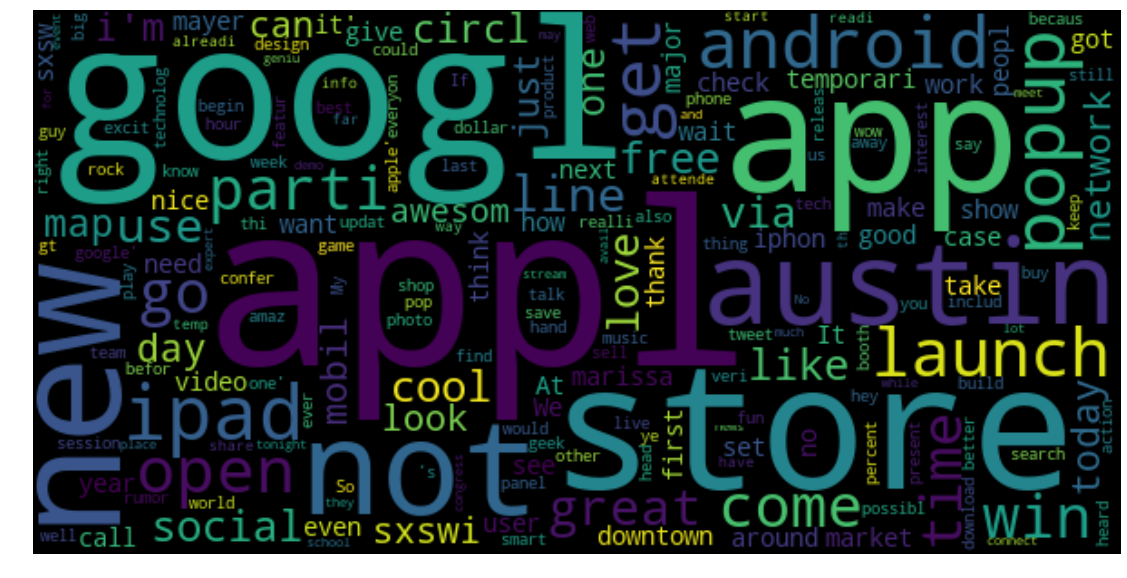

In [240]:
freq_dict = dict()
for tw in (data[data['sentiment'] == 2]['Clean_tweet']):
    for word in tw.split(" "):
        freq_dict[word] = freq_dict.get(word, 0) + 1
feat_count_sorted = dict(sorted(freq_dict.items(), key = lambda x: x[1], reverse = True))
count_data = {"Words":list(feat_count_sorted.keys()), "Count": list(feat_count_sorted.values())}
count_df = pd.DataFrame(data = count_data)
from wordcloud import WordCloud
worcloudPlot = WordCloud(background_color="black", width=600, height=300)
worcloudPlot.generate_from_frequencies(frequencies=freq_dict)
plt.figure(figsize=(20,10))
plt.imshow(worcloudPlot, interpolation="bilinear")
plt.axis("off")
plt.show()

# word cloud for sentiment : neutral

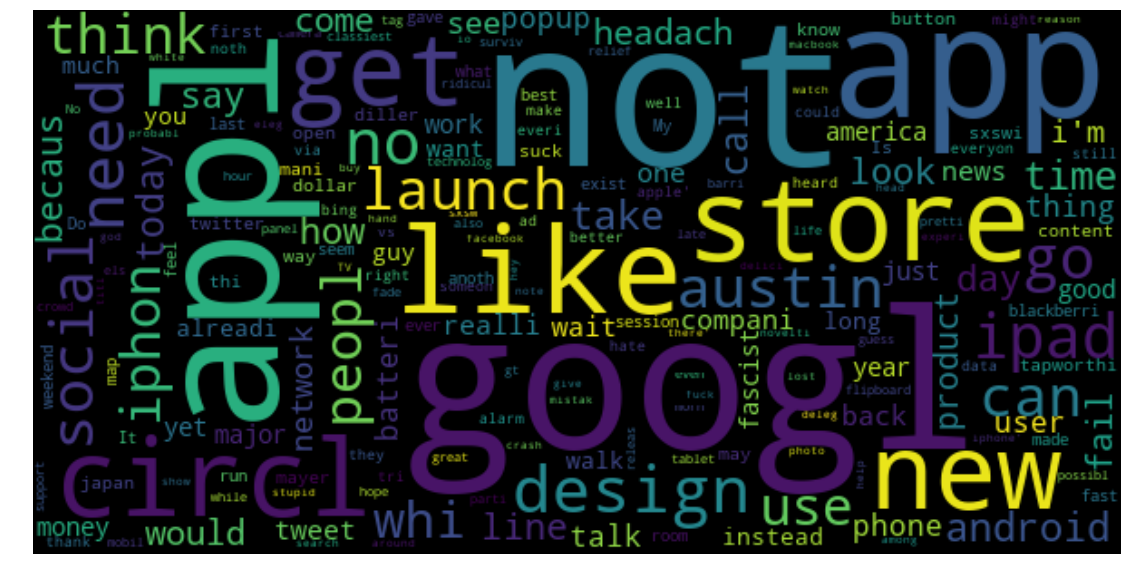

In [241]:
freq_dict = dict()
for tw in (data[data['sentiment'] == 0]['Clean_tweet']):
    for word in tw.split(" "):
        freq_dict[word] = freq_dict.get(word, 0) + 1
feat_count_sorted = dict(sorted(freq_dict.items(), key = lambda x: x[1], reverse = True))
count_data = {"Words":list(feat_count_sorted.keys()), "Count": list(feat_count_sorted.values())}
count_df = pd.DataFrame(data = count_data)
from wordcloud import WordCloud
worcloudPlot = WordCloud(background_color="black", width=600, height=300)
worcloudPlot.generate_from_frequencies(frequencies=freq_dict)
plt.figure(figsize=(20,10))
plt.imshow(worcloudPlot, interpolation="bilinear")
plt.axis("off")
plt.show()

# word cloud for sentiment : cant tell

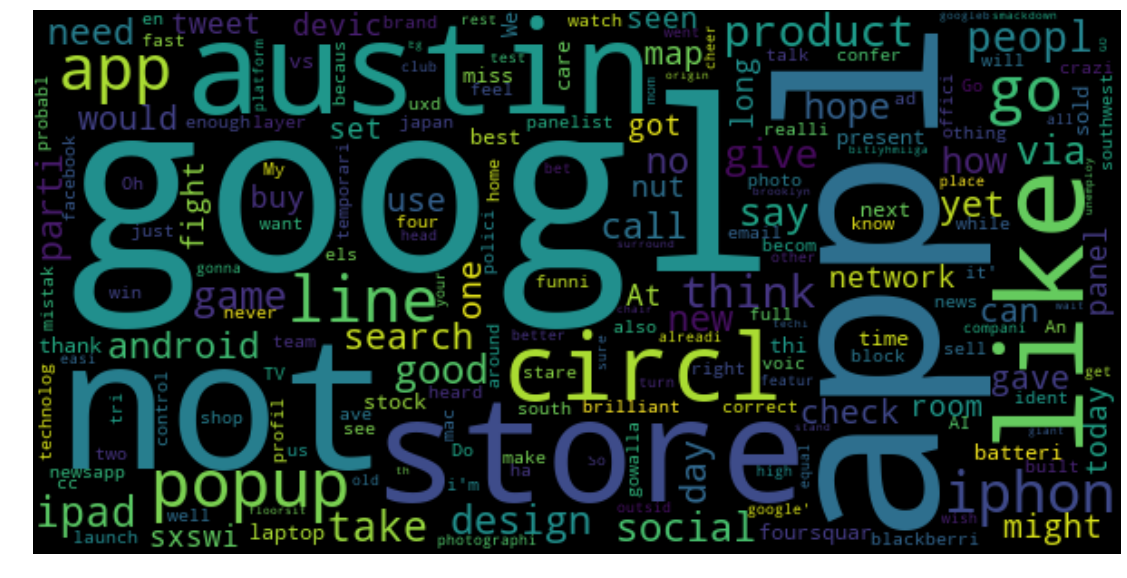

In [242]:
freq_dict = dict()
for tw in (data[data['sentiment'] == 3]['Clean_tweet']):
    for word in tw.split(" "):
        freq_dict[word] = freq_dict.get(word, 0) + 1
feat_count_sorted = dict(sorted(freq_dict.items(), key = lambda x: x[1], reverse = True))
count_data = {"Words":list(feat_count_sorted.keys()), "Count": list(feat_count_sorted.values())}
count_df = pd.DataFrame(data = count_data)
from wordcloud import WordCloud
worcloudPlot = WordCloud(background_color="black", width=600, height=300)
worcloudPlot.generate_from_frequencies(frequencies=freq_dict)
plt.figure(figsize=(20,10))
plt.imshow(worcloudPlot, interpolation="bilinear")
plt.axis("off")
plt.show()

# spliting data into train test and cv

In [244]:
result = data['Clean_tweet']

In [245]:
y_true = data['sentiment'].values


# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.15)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.15)

In [246]:
print('Before Vectorization')
print('Train--->',train_df.shape, y_train.shape)
print('CV------>',cv_df.shape, y_cv.shape)
print('Test---->',test_df.shape, y_test.shape)

Before Vectorization
Train---> (5254,) (5254,)
CV------> (928,) (928,)
Test----> (1092,) (1092,)


In [247]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])

Number of data points in train data: 5254
Number of data points in cross validation data: 928
Number of data points in test data: 1092


# tfidf 

In [250]:
tfidf = TfidfVectorizer(ngram_range=(1,2))
tfidf.fit_transform(train_df)

<5254x31551 sparse matrix of type '<class 'numpy.float64'>'
	with 92158 stored elements in Compressed Sparse Row format>

In [251]:
X_train_tfidf = tfidf.transform(train_df)
X_cv_tfidf = tfidf.transform(cv_df)
X_test_tfidf = tfidf.transform(test_df)

print("After vectorizations")
print(X_train_tfidf.shape, y_train.shape)
print(X_cv_tfidf.shape, y_test.shape)
print(X_test_tfidf.shape, y_test.shape)

After vectorizations
(5254, 31551) (5254,)
(928, 31551) (1092,)
(1092, 31551) (1092,)


# bow

In [252]:
count_vect = CountVectorizer()
count_vect.fit(train_df)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [253]:
X_train_bow = count_vect.transform(train_df)
X_cv_bow = count_vect.transform(cv_df)
X_test_bow = count_vect.transform(test_df)
print("After vectorizations")
print(X_train_bow.shape, y_train.shape)
print(X_cv_bow.shape, y_test.shape)
print(X_test_bow.shape, y_test.shape)

After vectorizations
(5254, 6032) (5254,)
(928, 6032) (1092,)
(1092, 6032) (1092,)


# ML models

In [254]:
def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [255]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

# Naive bayes Model with tfidf

for alpha = 0.001
Log Loss : 0.8398429590266628
for alpha = 0.1
Log Loss : 0.8263734358656726
for alpha = 0.01
Log Loss : 0.8333199948711084
for alpha = 1
Log Loss : 0.8261867316800809


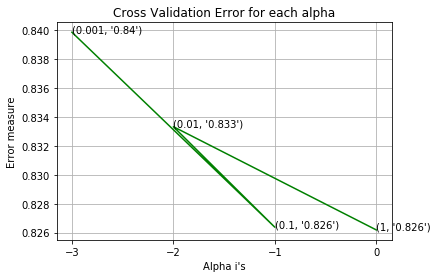

For values of best alpha =  1 The train log loss is: 0.5771005578969671
For values of best alpha =  1 The cross validation log loss is: 0.8261867316800809
For values of best alpha =  1 The test log loss is: 0.829961232979415


In [256]:
alpha = [ 0.001, 0.1,0.01, 1]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(X_train_tfidf, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_tfidf, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_cv_tfidf)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(X_train_tfidf, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_tfidf, y_train)


predict_y = sig_clf.predict_proba(X_train_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


## testing with best hyperparameter

Log Loss : 0.8261867316800809
-------------------- Confusion matrix --------------------


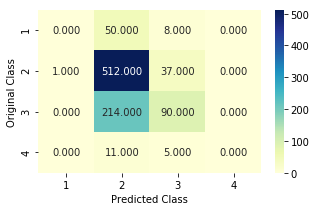

-------------------- Precision matrix (Columm Sum=1) --------------------


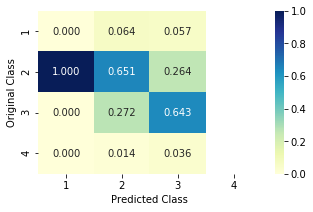

-------------------- Recall matrix (Row sum=1) --------------------


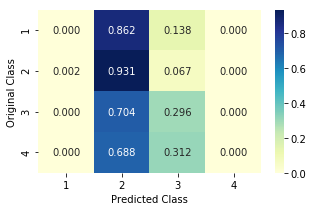

In [257]:
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(X_train_tfidf, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_tfidf, y_train)
sig_clf_probs = sig_clf.predict_proba(X_cv_tfidf)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(y_cv, sig_clf_probs))
#print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_onehotCoding)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(y_cv, sig_clf.predict(X_cv_tfidf.toarray()))

In [258]:
print(classification_report(y_test,sig_clf.predict(X_test_tfidf)))

              precision    recall  f1-score   support

           0       0.78      0.10      0.18        68
           1       0.64      0.96      0.77       647
           2       0.69      0.22      0.34       358
           3       0.00      0.00      0.00        19

    accuracy                           0.65      1092
   macro avg       0.53      0.32      0.32      1092
weighted avg       0.65      0.65      0.58      1092



# elastic net

for alpha = 100
Log Loss : 1.2888819859265035
for alpha = 500
Log Loss : 1.292284975796088
for alpha = 800
Log Loss : 1.290281612116066
for alpha = 1000
Log Loss : 1.2781886777021034
for alpha = 1200
Log Loss : 1.2854134108617026


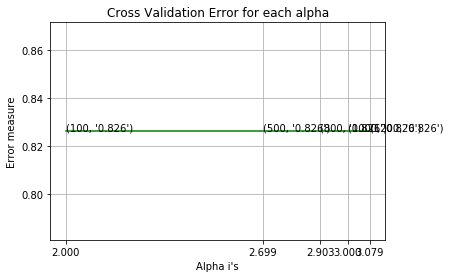

For values of best alpha =  100 The train log loss is: 0.07987858569871516
For values of best alpha =  100 The cross validation log loss is: 1.1367828595575589
For values of best alpha =  100 The test log loss is: 1.1014732817554587


In [259]:
alpha = [100,500,800,1000,1200]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = LogisticRegression(C=1200, penalty='elasticnet',solver='saga',l1_ratio=0.65)
    clf.fit(X_train_tfidf, y_train)
    clf_probs = clf.predict_proba(X_cv_tfidf)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = clf = LogisticRegression(C=alpha[best_alpha], penalty='elasticnet',solver='saga',l1_ratio=0.65)
clf.fit(X_train_tfidf, y_train)
clf.fit(X_train_tfidf, y_train)


predict_y = clf.predict_proba(X_train_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = clf.predict_proba(X_cv_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = clf.predict_proba(X_test_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


In [ ]:
log = LogisticRegression(C=1200, penalty='elasticnet',solver='saga',l1_ratio=0.65)
log.fit(X, y)
print(classification_report(y_test, log.predict(test_vector)))

# Naive bayes with bow

for alpha = 0.001
Log Loss : 0.8305107320267037
for alpha = 0.1
Log Loss : 0.8137036057000586
for alpha = 0.01
Log Loss : 0.8243124661825483
for alpha = 1
Log Loss : 0.8265744454233824


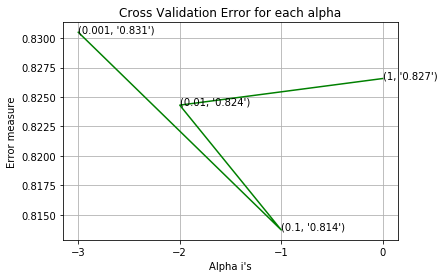

For values of best alpha =  0.1 The train log loss is: 0.611016978829124
For values of best alpha =  0.1 The cross validation log loss is: 0.8137036057000586
For values of best alpha =  0.1 The test log loss is: 0.834573314665434


In [51]:
alpha = [ 0.001, 0.1,0.01, 1]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(X_train_bow, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_bow, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_cv_bow)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs))

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(X_train_bow, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_bow, y_train)


predict_y = sig_clf.predict_proba(X_train_bow)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv_bow)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_bow)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


Log Loss : 0.8137036057000586
-------------------- Confusion matrix --------------------


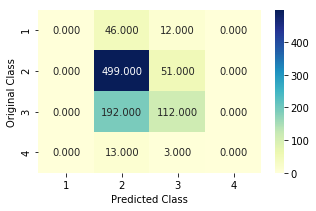

-------------------- Precision matrix (Columm Sum=1) --------------------


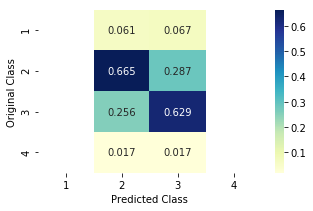

-------------------- Recall matrix (Row sum=1) --------------------


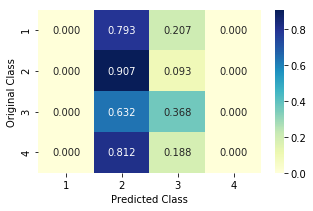

In [52]:
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(X_train_bow, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_bow, y_train)
sig_clf_probs = sig_clf.predict_proba(X_cv_bow)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(y_cv, sig_clf_probs))
#print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_onehotCoding)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(y_cv, sig_clf.predict(X_cv_bow.toarray()))

In [53]:
print(classification_report(y_test,sig_clf.predict(X_test_bow)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.65      0.87      0.74       647
           2       0.56      0.35      0.43       358
           3       0.00      0.00      0.00        19

    accuracy                           0.63      1092
   macro avg       0.30      0.31      0.29      1092
weighted avg       0.57      0.63      0.58      1092



# Logistic regression with tfidf

for alpha = 1e-06
Log Loss : 0.7590259471265458
for alpha = 1e-05
Log Loss : 0.7345496964082191
for alpha = 0.0001
Log Loss : 0.7295149035586563
for alpha = 0.001
Log Loss : 0.7771414704188963
for alpha = 0.01
Log Loss : 0.8472441281358146
for alpha = 0.1
Log Loss : 0.8802581159418283
for alpha = 1
Log Loss : 0.884424165951214
for alpha = 10
Log Loss : 0.8849606025972703
for alpha = 100
Log Loss : 0.8850502247717402


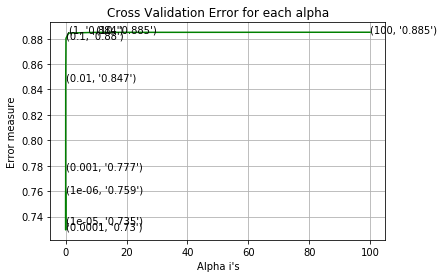

For values of best alpha =  0.0001 The train log loss is: 0.46725037806670294
For values of best alpha =  0.0001 The cross validation log loss is: 0.733839742896785
For values of best alpha =  0.0001 The test log loss is: 0.769494702424347


In [72]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier( alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train_tfidf, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_tfidf, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_cv_tfidf)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train_tfidf, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_tfidf, y_train)

predict_y = sig_clf.predict_proba(X_train_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 0.7295149035586563
Number of mis-classified points : 0.2963362068965517
-------------------- Confusion matrix --------------------


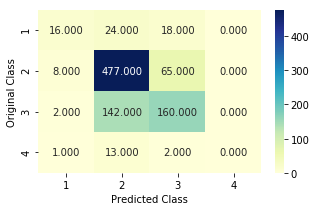

-------------------- Precision matrix (Columm Sum=1) --------------------


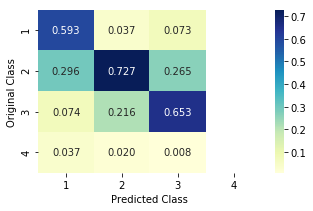

-------------------- Recall matrix (Row sum=1) --------------------


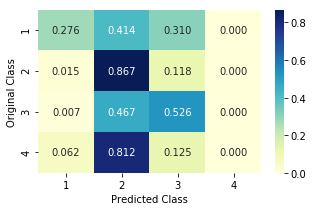

In [73]:
clf = SGDClassifier( alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(X_train_tfidf, y_train, X_cv_tfidf, y_cv, clf)

In [74]:
print(classification_report(y_test,clf.predict(X_test_tfidf)))

              precision    recall  f1-score   support

           0       1.00      0.01      0.03        68
           1       0.68      0.89      0.77       647
           2       0.64      0.44      0.52       358
           3       0.00      0.00      0.00        19

    accuracy                           0.67      1092
   macro avg       0.58      0.34      0.33      1092
weighted avg       0.68      0.67      0.63      1092



# Logistic regression with bow

for alpha = 1e-06
Log Loss : 0.8006888932356023
for alpha = 1e-05
Log Loss : 0.7882729232392363
for alpha = 0.0001
Log Loss : 0.7549141867246432
for alpha = 0.001
Log Loss : 0.7461280699586356
for alpha = 0.01
Log Loss : 0.7965282773247931
for alpha = 0.1
Log Loss : 0.858261552131312
for alpha = 1
Log Loss : 0.8829079359051357
for alpha = 10
Log Loss : 0.8878361025928466
for alpha = 100
Log Loss : 0.8884180885472941


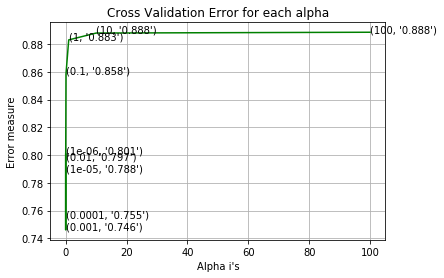

For values of best alpha =  0.001 The train log loss is: 0.60798212243501
For values of best alpha =  0.001 The cross validation log loss is: 0.7490743834224851
For values of best alpha =  0.001 The test log loss is: 0.789419757885498


In [75]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier( alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train_bow, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_bow, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_cv_bow)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train_bow, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_bow, y_train)

predict_y = sig_clf.predict_proba(X_train_bow)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv_bow)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_bow)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 0.7461280699586356
Number of mis-classified points : 0.31573275862068967
-------------------- Confusion matrix --------------------


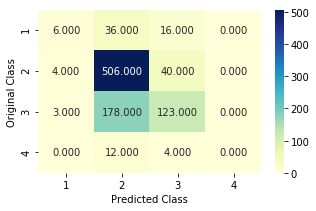

-------------------- Precision matrix (Columm Sum=1) --------------------


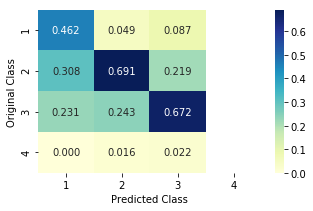

-------------------- Recall matrix (Row sum=1) --------------------


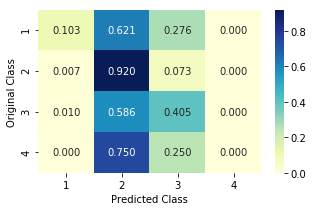

In [76]:
clf = SGDClassifier( alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(X_train_bow, y_train, X_cv_bow, y_cv, clf)

In [77]:
print(classification_report(y_test,clf.predict(X_test_bow)))

              precision    recall  f1-score   support

           0       0.14      0.03      0.05        68
           1       0.68      0.86      0.76       647
           2       0.61      0.44      0.51       358
           3       0.00      0.00      0.00        19

    accuracy                           0.66      1092
   macro avg       0.36      0.33      0.33      1092
weighted avg       0.61      0.66      0.62      1092



# SVM

In [36]:
alpha = [10 ** x for x in range(-5, 3)]
alpha

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

for C = 0.001
Log Loss : 0.7976603882701049
for C = 0.002
Log Loss : 0.8023663216732161
for C = 0.003
Log Loss : 0.8050791212090724


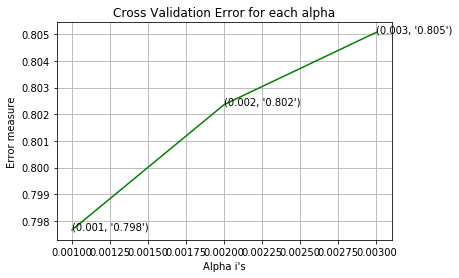

For values of best alpha =  0.001 The train log loss is: 0.7073574345402287
For values of best alpha =  0.001 The cross validation log loss is: 0.7975783516287374
For values of best alpha =  0.001 The test log loss is: 0.8072846857259376


In [37]:
alpha = [0.001,0.002,0.003]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge')
    clf.fit(X_train_tfidf, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_tfidf, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_cv_tfidf)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(X_train_tfidf,y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_tfidf, y_train)

predict_y = sig_clf.predict_proba(X_train_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

In [38]:
print(classification_report(y_test,sig_clf.predict(X_test_tfidf)))

              precision    recall  f1-score   support

           0       0.60      0.04      0.08        68
           1       0.66      0.91      0.77       647
           2       0.63      0.33      0.43       358
           3       0.00      0.00      0.00        19

    accuracy                           0.65      1092
   macro avg       0.47      0.32      0.32      1092
weighted avg       0.63      0.65      0.60      1092



# random forest classifier with tfidf

In [ ]:
alpha = [1500,2000]
max_depth = [10,20,30]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(X_train_tfidf, y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(X_train_tfidf, y_train)
        sig_clf_probs = sig_clf.predict_proba(X_cv_tfidf)
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(X_train_tfidf, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_tfidf, y_train)

predict_y = sig_clf.predict_proba(X_train_tfidf)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv_tfidf)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_tfidf)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 0.8070152312160814
Number of mis-classified points : 0.35021551724137934
-------------------- Confusion matrix --------------------


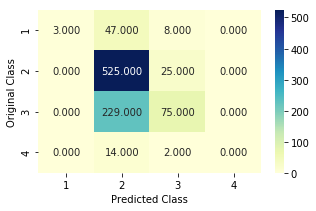

-------------------- Precision matrix (Columm Sum=1) --------------------


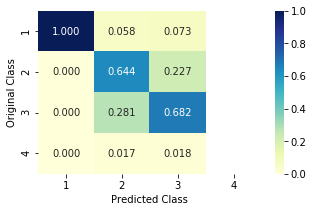

-------------------- Recall matrix (Row sum=1) --------------------


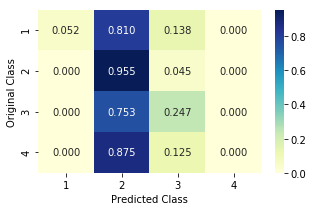

In [79]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(X_train_tfidf,y_train,X_cv_tfidf,y_cv, clf)

In [81]:
print(classification_report(y_test,clf.predict(X_test_tfidf)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.60      1.00      0.75       647
           2       0.80      0.02      0.04       358
           3       0.00      0.00      0.00        19

    accuracy                           0.60      1092
   macro avg       0.35      0.26      0.20      1092
weighted avg       0.62      0.60      0.46      1092



In [39]:
from xgboost import XGBClassifier

In [40]:
%%time
alpha = [60,50]
max_depth = [60,70]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = XGBClassifier(booster ='gbtree', n_estimators=i, max_depth=j)
        clf.fit(X_train_tfidf, y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(X_train_tfidf, y_train)
        sig_clf_probs = sig_clf.predict_proba(X_cv_tfidf)
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

for n_estimators = 60 and max depth =  60
Log Loss : 0.8255862291517789
for n_estimators = 60 and max depth =  70
Log Loss : 0.8264234840330027
for n_estimators = 50 and max depth =  60
Log Loss : 0.8247939547061782
for n_estimators = 50 and max depth =  70
Log Loss : 0.825536521247177
Wall time: 3min 20s


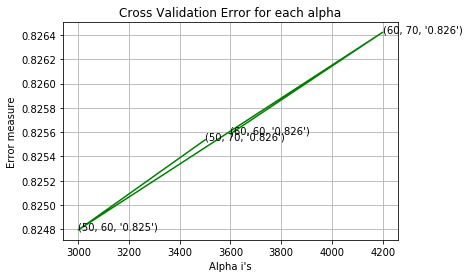

In [41]:
fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

